Dataset caricato correttamente.

Prime 5 righe del dataset:
                              Name             Gender  Rating Value  \
0               9am Afnanfor women          for women          3.73   
1  9am Dive Afnanfor women and men  for women and men          4.29   
2    9am pour Femme Afnanfor women          for women          4.00   
3                 9pm Afnanfor men            for men          4.50   
4    9pm pour Femme Afnanfor women          for women          3.49   

  Rating Count                                       Main Accords Perfumers  \
0          174  ['citrus', 'musky', 'woody', 'aromatic', 'warm...        []   
1          842  ['fruity', 'woody', 'green', 'warm spicy', 'ar...        []   
2           68  ['fruity', 'musky', 'amber', 'citrus', 'powder...        []   
3        6,865  ['vanilla', 'amber', 'warm spicy', 'cinnamon',...        []   
4           63  ['woody', 'aromatic', 'rose', 'fruity', 'powde...        []   

                                      

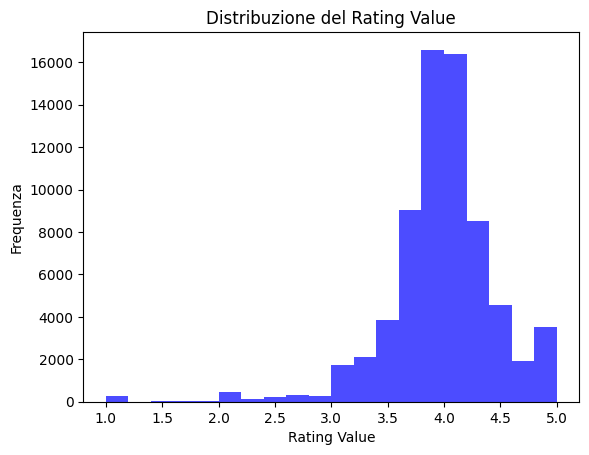

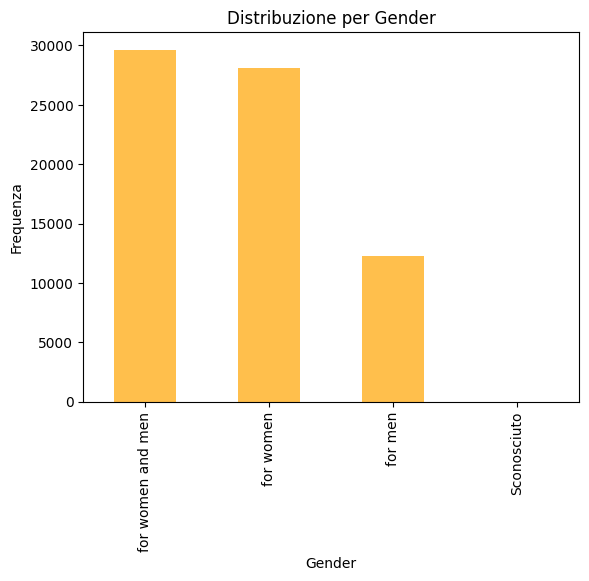


Media del Rating Value per Gender:
Gender
Sconosciuto          3.976368
for men              3.975393
for women            3.951301
for women and men    4.000870
Name: Rating Value, dtype: float64


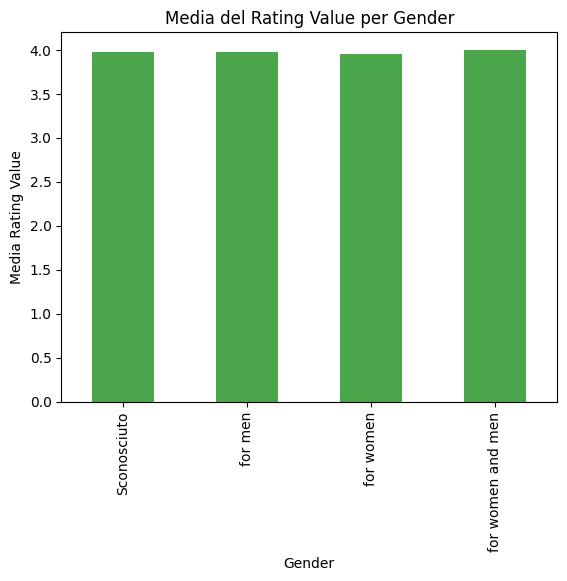


Media del Rating Value per Accordo Principale (Top 10):
        Accord  Mean Rating
8        amber     4.015455
5   warm spicy     4.005217
1      powdery     3.984990
0        woody     3.982237
3        sweet     3.980298
7  fresh spicy     3.977427
4     aromatic     3.975276
6       floral     3.964657
2       citrus     3.962135
9       fruity     3.946977


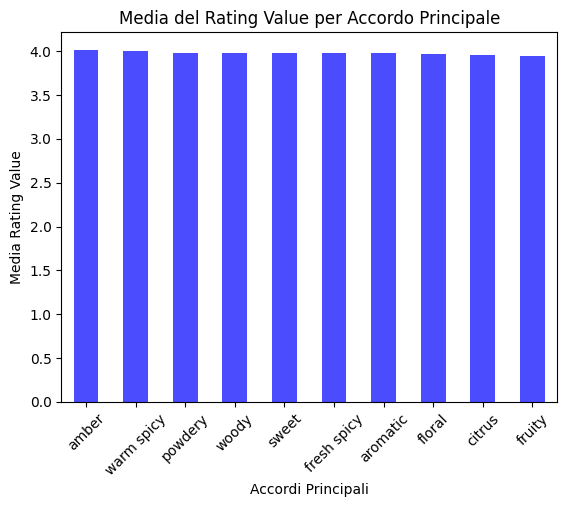


Deviazione standard del Rating Value per Accordo Principale:
woody: 0.49
powdery: 0.49
citrus: 0.50
sweet: 0.48
aromatic: 0.50
warm spicy: 0.50
floral: 0.49
fresh spicy: 0.51
amber: 0.51
fruity: 0.48

I 10 accordi principali più popolari (per frequenza):
woody: 45127
powdery: 35469
citrus: 33667
sweet: 32438
aromatic: 29546
warm spicy: 27196
floral: 27055
fresh spicy: 24724
amber: 24550
fruity: 23739

Confronto tra Popolarità e Media del Rating Value per i Top 10 Accordi:
        Accord  Frequency  Mean Rating
0        woody      45127     3.982237
1      powdery      35469     3.984990
2       citrus      33667     3.962135
3        sweet      32438     3.980298
4     aromatic      29546     3.975276
5   warm spicy      27196     4.005217
6       floral      27055     3.964657
7  fresh spicy      24724     3.977427
8        amber      24550     4.015455
9       fruity      23739     3.946977


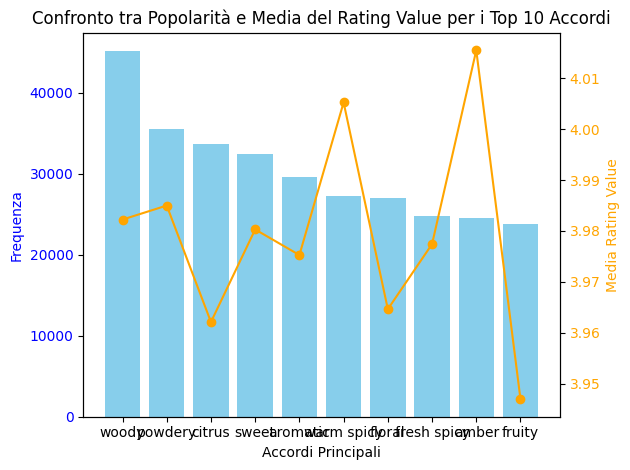


Media del Rating Count per Accordo Principale (Top 10):
woody: 227.70
powdery: 221.91
citrus: 210.15
sweet: 242.10
aromatic: 221.20
warm spicy: 225.86
floral: 214.56
fresh spicy: 207.29
amber: 220.50
fruity: 233.10

Accordi più comuni per Rating Value alto (>4.5):
[('woody', 3999), ('powdery', 3157), ('sweet', 2772), ('citrus', 2765), ('warm spicy', 2698), ('amber', 2612), ('aromatic', 2536), ('floral', 2185), ('musky', 2169), ('fresh spicy', 2162)]

Accordi più comuni per Rating Value basso (<2.5):
[('woody', 634), ('citrus', 515), ('powdery', 446), ('aromatic', 431), ('sweet', 391), ('fresh spicy', 382), ('amber', 374), ('floral', 366), ('warm spicy', 361), ('white floral', 351)]


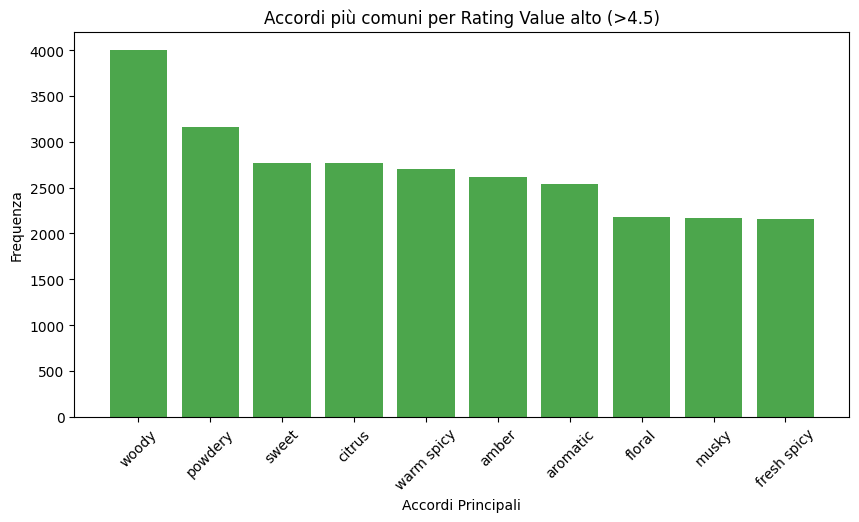

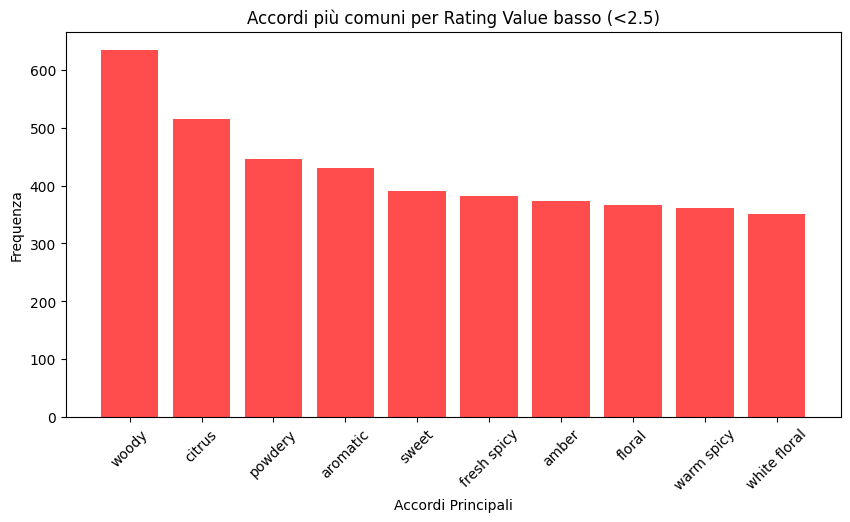

In [15]:
# Importa la libreria pandas
import pandas as pd

# Carica il dataset
df = pd.read_csv("fra_perfumes.csv")
print("Dataset caricato correttamente.")

# Visualizza le prime 5 righe del dataset
print("\nPrime 5 righe del dataset:")
print(df.head(5))

# Informazioni sul dataset
print("\nInformazioni sul dataset:")
print(df.info())

# Controllo dei valori nulli
print("\nValori nulli per colonna (prima della gestione):")
print(df.isnull().sum())

# Gestione dei valori nulli
# Sostituisci i valori nulli in 'Rating Value' con la media
df['Rating Value'] = df['Rating Value'].fillna(df['Rating Value'].mean())

# Sostituisci i valori nulli in 'Rating Count' con 0
df['Rating Count'] = df['Rating Count'].fillna(0)

# Sostituisci i valori nulli in 'Name', 'Gender', e 'Description'
df['Name'] = df['Name'].fillna('Sconosciuto')
df['Gender'] = df['Gender'].fillna('Sconosciuto')
df['Description'] = df['Description'].fillna('Non disponibile')

# Controlla di nuovo i valori nulli
print("\nValori nulli per colonna (dopo la gestione):")
print(df.isnull().sum())

# Conversione della colonna 'Rating Count' in numeri interi
df['Rating Count'] = df['Rating Count'].replace(',', '', regex=True).astype(int)

# Controllo delle righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# Rimuovi le righe duplicate
df.drop_duplicates(inplace=True)
print("\nNumero di righe dopo la rimozione dei duplicati:", len(df))

# Verifica finale del dataset
print("\nInformazioni finali sul dataset:")
print(df.info())

# Statistiche descrittive di Rating Value
print("\nStatistiche descrittive di 'Rating Value':")
print(df['Rating Value'].describe())

# Distribuzione di 'Gender'
print("\nDistribuzione dei valori in 'Gender':")
print(df['Gender'].value_counts())

# Distribuzione di 'Main Accords' (primi 10 accordi più comuni)
from collections import Counter

# Estrai gli accordi principali da tutte le righe
accords = [item.strip() for sublist in df['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")]
accords_count = Counter(accords)
print("\nI 10 accordi principali più comuni:")
print(accords_count.most_common(10))

# Istogramma per la distribuzione del Rating Value
import matplotlib.pyplot as plt

plt.hist(df['Rating Value'], bins=20, alpha=0.7, color='blue')
plt.title('Distribuzione del Rating Value')
plt.xlabel('Rating Value')
plt.ylabel('Frequenza')
plt.show()

# Grafico a barre per Gender
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribuzione per Gender')
plt.xlabel('Gender')
plt.ylabel('Frequenza')
plt.show()

# Relazione tra 'Gender' e 'Rating Value' (media dei rating per categoria di genere)
gender_rating = df.groupby('Gender')['Rating Value'].mean()
print("\nMedia del Rating Value per Gender:")
print(gender_rating)

# Visualizzazione della relazione tra 'Gender' e 'Rating Value'
gender_rating.plot(kind='bar', color='green', alpha=0.7)
plt.title("Media del Rating Value per Gender")
plt.xlabel("Gender")
plt.ylabel("Media Rating Value")
plt.show()

# Relazione tra 'Main Accords' e 'Rating Value' (10 accordi più comuni)
from collections import Counter

# Estrai e conta gli accordi
accords = [item.strip() for sublist in df['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")]
accords_count = Counter(accords)

# Prendi i 10 accordi più comuni
top_accords = [accord[0] for accord in accords_count.most_common(10)]

# Filtra il dataset per i 10 accordi più comuni e calcola la media dei rating
accords_rating = {}
for accord in top_accords:
    accords_rating[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Value'].mean()

# Trasforma in DataFrame per la visualizzazione
import pandas as pd
accords_rating_df = pd.DataFrame(list(accords_rating.items()), columns=['Accord', 'Mean Rating'])
accords_rating_df = accords_rating_df.sort_values(by='Mean Rating', ascending=False)

print("\nMedia del Rating Value per Accordo Principale (Top 10):")
print(accords_rating_df)

# Visualizzazione della relazione tra accordi principali e Rating Value
accords_rating_df.plot(kind='bar', x='Accord', y='Mean Rating', color='blue', alpha=0.7, legend=False)
plt.title("Media del Rating Value per Accordo Principale")
plt.xlabel("Accordi Principali")
plt.ylabel("Media Rating Value")
plt.xticks(rotation=45)
plt.show()

# Calcolo della deviazione standard del Rating Value per ciascun accordo principale
accords_rating_std = {}
for accord in top_accords:
    accords_rating_std[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Value'].std()

# Mostra i risultati
print("\nDeviazione standard del Rating Value per Accordo Principale:")
for accord, std in accords_rating_std.items():
    print(f"{accord}: {std:.2f}")

# Calcola la frequenza totale di ciascun accordo
accords_frequency = Counter(accords)

# Mostra i 10 accordi più comuni
top_accords_frequency = accords_frequency.most_common(10)
print("\nI 10 accordi principali più popolari (per frequenza):")
for accord, freq in top_accords_frequency:
    print(f"{accord}: {freq}")

# Combina media rating e frequenza per i top 10 accordi
accords_popularity_rating = [{"Accord": accord, "Frequency": freq, "Mean Rating": accords_rating[accord]}
    for accord, freq in top_accords_frequency]

# Trasforma in DataFrame per analisi e visualizzazione
accords_popularity_rating_df = pd.DataFrame(accords_popularity_rating)

# Mostra i dati ordinati per frequenza
print("\nConfronto tra Popolarità e Media del Rating Value per i Top 10 Accordi:")
print(accords_popularity_rating_df.sort_values(by="Frequency", ascending=False))

# Grafico combinato
fig, ax1 = plt.subplots()

# Frequenza (bar)
ax1.bar(
    accords_popularity_rating_df["Accord"],
    accords_popularity_rating_df["Frequency"],
    color="skyblue",
    label="Frequency")

ax1.set_xlabel("Accordi Principali")
ax1.set_ylabel("Frequenza", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Media Rating Value (line)
ax2 = ax1.twinx()
ax2.plot(
    accords_popularity_rating_df["Accord"],
    accords_popularity_rating_df["Mean Rating"],
    color="orange",
    marker="o",
    label="Mean Rating")

ax2.set_ylabel("Media Rating Value", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Titolo e legende
plt.title("Confronto tra Popolarità e Media del Rating Value per i Top 10 Accordi")
fig.tight_layout()
plt.show()

# Media del Rating Count per i 10 accordi principali
accords_rating_count = {}
for accord in top_accords:
    accords_rating_count[accord] = df[df['Main Accords'].str.contains(accord)]['Rating Count'].mean()

print("\nMedia del Rating Count per Accordo Principale (Top 10):")
for accord, count in accords_rating_count.items():
    print(f"{accord}: {count:.2f}")

# Filtra i profumi con rating estremi
high_ratings = df[df['Rating Value'] > 4.5]
low_ratings = df[df['Rating Value'] < 2.5]

# Conta gli accordi per rating alto e basso
from collections import Counter

# Accordi per profumi con rating alto
high_accords = Counter([item.strip() for sublist in high_ratings['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")])

# Accordi per profumi con rating basso
low_accords = Counter([item.strip() for sublist in low_ratings['Main Accords'] for item in sublist.strip("[]").replace("'", "").split(",")])

# Mostra i risultati
print("\nAccordi più comuni per Rating Value alto (>4.5):")
print(high_accords.most_common(10))

print("\nAccordi più comuni per Rating Value basso (<2.5):")
print(low_accords.most_common(10))

# Converte i risultati in un DataFrame per i grafici
high_accords_df = pd.DataFrame(high_accords.most_common(10), columns=["Accord", "Frequency"])
low_accords_df = pd.DataFrame(low_accords.most_common(10), columns=["Accord", "Frequency"])

# Grafico per Rating Value alto
plt.figure(figsize=(10, 5))
plt.bar(high_accords_df["Accord"], high_accords_df["Frequency"], color="green", alpha=0.7)
plt.title("Accordi più comuni per Rating Value alto (>4.5)")
plt.xlabel("Accordi Principali")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.show()

# Grafico per Rating Value basso
plt.figure(figsize=(10, 5))
plt.bar(low_accords_df["Accord"], low_accords_df["Frequency"], color="red", alpha=0.7)
plt.title("Accordi più comuni per Rating Value basso (<2.5)")
plt.xlabel("Accordi Principali")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.show()

